In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from pprint import pprint
from gif import gen_gif
import joblib
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
sns.set()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

paths = ["../models/convlstm/output/",
         "../models/earthformer/output/",
         "../models/linear/output/"]

In [30]:
# !python get_models_info.py

dt = pd.read_csv("../output/run_summary.csv")
dt.data = dt.data.str.split("_").apply(lambda x: x[1])
dt.rename({"model_name": "model"}, axis=1, inplace=True)
dt.columns

Index(['task', 'data', 'model', 'gpu', 'n_epochs', 'batch_size',
       'opt_params.lr', 'opt_params.weight_decay', 'opt', 'loss',
       ...
       'model_params.dec_depth', 'model_params.num_heads',
       'model_params.enc_cuboid_size', 'model_params.num_global_vectors',
       'model_params.initial_downsample_scale', 'aux_feats',
       'model_params.emb_len', 'model_params.temperature',
       'model_params.use_emb', 'model_params.dec_kernel_size'],
      dtype='object', length=140)

In [22]:
pprint(dt.columns.tolist())

['task',
 'data',
 'model',
 'gpu',
 'n_epochs',
 'batch_size',
 'opt_params.lr',
 'opt_params.weight_decay',
 'opt',
 'loss',
 'seq_len',
 'pred_len',
 'model_params.input_dim',
 'model_params.hidden_dim',
 'model_params.kernel_size',
 'model_params.num_layers',
 'model_params.batch_first',
 'model_params.return_all_layers',
 'model_params.C_out',
 'model_params.pred_len',
 'exp_id',
 'train_time',
 'train_loss_epoch',
 'val_loss_epoch',
 'min_val_loss_epoch',
 'min_train_loss_epoch',
 'epoch_min_val_loss_epoch',
 'acc_1_train',
 'acc_6_train',
 'acc_12_train',
 'acc_1_val',
 'acc_6_val',
 'acc_12_val',
 'acc_1_test',
 'acc_6_test',
 'acc_12_test',
 'acc_all_train',
 'acc_all_val',
 'acc_all_test',
 'config_path',
 'auc_1_train',
 'pr_1_train',
 'f1_1_train',
 'auc_6_train',
 'pr_6_train',
 'f1_6_train',
 'auc_12_train',
 'pr_12_train',
 'f1_12_train',
 'auc_all_train',
 'pr_all_train',
 'f1_all_train',
 'auc_1_val',
 'pr_1_val',
 'f1_1_val',
 'auc_6_val',
 'pr_6_val',
 'f1_6_val',
 '

In [23]:
dt.head()

,task,data,model,gpu,n_epochs,batch_size,opt_params.lr,opt_params.weight_decay,opt,loss,...,model_params.dec_depth,model_params.num_heads,model_params.enc_cuboid_size,model_params.num_global_vectors,model_params.initial_downsample_scale,aux_feats,model_params.emb_len,model_params.temperature,model_params.use_emb,model_params.dec_kernel_size
0,multiclass,CentralKZ,ConvLSTM,0,30.0,4.0,0.001,0.00001,AdamW,CrossEntropyLoss,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,binary,MadhyaPradesh,ConvLSTM,0,30.0,4.0,0.001,0.00001,AdamW,BCEWithLogitsLoss,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,multiclass,MadhyaPradesh,ConvLSTM,0,30.0,4.0,0.001,0.00001,AdamW,CrossEntropyLoss,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,binary,CentralKZ,ConvLSTM,0,30.0,4.0,0.001,0.00001,AdamW,BCEWithLogitsLoss,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,binary,Missouri,ConvLSTM,0,30.0,4.0,0.001,0.00001,AdamW,BCEWithLogitsLoss,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
dt.shape

(100, 140)

_____________________________________________________

In [25]:
exp = []

for model_name in ["Linear", "NLinear", "DLinear"]:
    c = {}
    c["model_name"] = model_name
    c["aux_feats"] = ['inter_force_power_2']
    
    c["model_params"] = {
        "emb_len": 16,
        "temperature": 1,
        "use_emb": True,
    }
    exp.append(c)

exp_ids1 = gen_gif(paths=paths, target_filter=exp, ret_only_ids=True, verbose=0)
joblib.dump(exp_ids1, "exp_ids1.pkl")

exp = []

for model_name in ["ConvLSTM"]:
    c = {}
    c["model_name"] = model_name
    exp.append(c)

for model_name in ["EarthFormer"]:
    c = {}
    c["model_name"] = model_name
    c["opt_params"] = {"lr": 0.0001, 'weight_decay': 1e-5}
    exp.append(c)

for model_name in ["Linear", "NLinear", "DLinear"]:
    c = {}
    c["model_name"] = model_name
    c["aux_feats"] = ['inter_force_power_2']
    
    c["model_params"] = {
        "emb_len": 16,
        "temperature": 1,
        "use_emb": True,
    }
    exp.append(c)

exp_ids2 = gen_gif(paths=paths, target_filter=exp, ret_only_ids=True, verbose=0)
joblib.dump(exp_ids2, "exp_ids2.pkl")

exp = []

for model_name in ["Linear", "NLinear", "DLinear"]:
    c = {}
    c["model_name"] = model_name
    c["aux_feats"] = []
    c["task"] = "reg"
    
    c["model_params"] = {
        "emb_len": 16,
        "temperature": 1,
        "use_emb": False,
    }
    exp.append(c)

exp_ids3 = gen_gif(paths=paths, target_filter=exp, ret_only_ids=True, verbose=0)
joblib.dump(exp_ids3, "exp_ids3.pkl")

exp = []
temps = [0.5, 1, 2]
emb_lens = [16, 32, 64]

for model_name in ["Linear"]:
    for temp in temps:
        for emb_len in emb_lens:
            c = {}
            c["model_name"] = model_name
            c["aux_feats"] = []
            c["task"] = "reg"
            
            c["model_params"] = {
                "emb_len": emb_len,
                "temperature": temp,
                "use_emb": True,
            }
            exp.append(c)

exp_ids4 = gen_gif(paths=paths, target_filter=exp, ret_only_ids=True, verbose=0)
joblib.dump(exp_ids4, "exp_ids4.pkl")

exp = []

for model_name in ["Linear", "NLinear", "DLinear"]:
    c = {}
    c["model_name"] = model_name
    c["aux_feats"] = ["inter_force_power_2"]
    
    c["model_params"] = {
        "emb_len": 16,
        "temperature": 1,
        "use_emb": True,
    }
    exp.append(c)

exp_ids5 = gen_gif(paths=paths, target_filter=exp, ret_only_ids=True, verbose=0)
joblib.dump(exp_ids5, "exp_ids5.pkl")

exp = []

for model_name in ["Linear", "NLinear", "DLinear"]:
    c = {}
    c["model_name"] = model_name
    c["aux_feats"] = []
    
    c["model_params"] = {
        "emb_len": 16,
        "temperature": 1,
        "use_emb": False,
    }
    exp.append(c)

for model_name in ["Linear", "NLinear", "DLinear"]:
    c = {}
    c["model_name"] = model_name
    c["aux_feats"] = []
    
    c["model_params"] = {
        "emb_len": 16,
        "temperature": 1,
        "use_emb": True,
    }
    exp.append(c)

for model_name in ["Linear", "NLinear", "DLinear"]:
    c = {}
    c["model_name"] = model_name
    c["aux_feats"] = ["inter_force_power_2"]
    
    c["model_params"] = {
        "emb_len": 16,
        "temperature": 1,
        "use_emb": True,
    }
    exp.append(c)

exp_ids6 = gen_gif(paths=paths, target_filter=exp, ret_only_ids=True, verbose=0)
joblib.dump(exp_ids6, "exp_ids6.pkl")


In [187]:
exp_ids1 = joblib.load("exp_ids1.pkl")
exp_ids2 = joblib.load("exp_ids2.pkl")
exp_ids3 = joblib.load("exp_ids3.pkl")
exp_ids4 = joblib.load("exp_ids4.pkl")
exp_ids5 = joblib.load("exp_ids5.pkl")
exp_ids6 = joblib.load("exp_ids6.pkl")

In [188]:
color = "darkgreen"
# color = "lightgreen"

model_order = ["Linear", "NLinear", "DLinear", "ConvLSTM", "EarthFormer"]
k = "1"
task_to_metric = {
    "binary": "auc_" + k + "_test",
    "reg": "r2_" + k + "_test",
    "multiclass": "acc_" + k + "_test",
}

for exp_ids in [exp_ids1, exp_ids2]:
    _dt = dt[dt.exp_id.isin(exp_ids)].copy()
    _model_order = [x for x in model_order if x in _dt.model.values]
    for task in _dt.task.unique():
        metric = task_to_metric[task]
        
        if len(_dt) > 0:
            print(task, metric)
            display(
                pd.pivot_table(_dt, index=_dt.data,
                                columns=_dt.model,
                                values=metric, aggfunc='max')[_model_order].style.highlight_max(axis=1, color=color).format('{:.3f}')\
            )
            
            # print(
            #     pd.pivot_table(_dt, index=_dt.data,
            #                     columns=_dt.model,
            #                     values=metric, aggfunc='max')[_model_order].round(3).to_latex(multirow=True)
            # )


reg r2_1_test


model,Linear,NLinear,DLinear
data,,,
CentralKZ,0.905,0.905,0.919
MadhyaPradesh,0.883,0.818,0.883
Missouri,0.934,0.935,0.943


multiclass acc_1_test


model,Linear,NLinear,DLinear
data,,,
CentralKZ,0.228,0.341,0.222
MadhyaPradesh,0.331,0.330,0.334
Missouri,0.784,0.451,0.791


binary auc_1_test


model,Linear,NLinear,DLinear
data,,,
CentralKZ,0.991,0.990,0.985
MadhyaPradesh,0.994,0.995,0.994
Missouri,0.997,0.998,0.998


multiclass acc_1_test


model,Linear,NLinear,DLinear,ConvLSTM,EarthFormer
data,,,,,
CentralKZ,0.228,0.341,0.222,0.822,0.502
MadhyaPradesh,0.331,0.330,0.334,0.831,nan
Missouri,0.784,0.451,0.791,0.863,0.617


binary auc_1_test


model,Linear,NLinear,DLinear,ConvLSTM,EarthFormer
data,,,,,
CentralKZ,0.991,0.990,0.985,0.895,0.703
MadhyaPradesh,0.994,0.995,0.994,0.922,0.900
Missouri,0.997,0.998,0.998,0.773,0.672


reg r2_1_test


model,Linear,NLinear,DLinear,ConvLSTM,EarthFormer
data,,,,,
CentralKZ,0.905,0.905,0.919,0.854,0.184
MadhyaPradesh,0.883,0.818,0.883,0.870,-0.220
Missouri,0.934,0.935,0.943,0.885,0.557


In [189]:
for exp_ids in [exp_ids2]:
    _dt = dt[dt.exp_id.isin(exp_ids)].copy()
    t = (_dt.rename({"train_time": "time (min)"}, axis=1)[["model", "time (min)"]].groupby("model").agg(["median"]) / 60).sort_values(("time (min)", "median"))
    t.loc["EarthFormer"] /= 2
    display(t)

,time (min)
,median
model,
Linear,1.107213
NLinear,1.140015
DLinear,1.823801
ConvLSTM,13.326720
EarthFormer,30.599837


In [194]:
task_to_metrics = {
    "binary": ["auc", "pr", "f1"],
    "reg": ["r2", "mse", "mae", "rmse"],
    "multiclass": ["acc"],
}

_dt = dt[(dt.exp_id.isin(exp_ids2))].copy()
new_dt = pd.DataFrame(columns=["task", "data", "model", "metric", "horizon", "value"])

for i, r in _dt.iterrows():
    for task, metrics in task_to_metrics.items():
        for metric in metrics:
            for horizon in [1, 6, 12]:
                new_dt.loc[len(new_dt)] = [task, r["data"], r["model"], metric, horizon, r[metric + "_" + str(horizon) + "_test"]]

_dt = new_dt
_dt = _dt[_dt.value.isna() == False]
indx_col = ["model", "metric"]
cols = ["data", "horizon"]
val = "value"

for task in task_to_metrics.keys():
    dt2 = _dt[_dt.task == task]
    
    display(
        pd.pivot_table(dt2, index=indx_col,
                        columns=cols,
                        values=val, aggfunc='max').round(3)#.droplevel(0, axis=0).style.format('{:.3f}')\
    )

data               CentralKZ               MadhyaPradesh                \
horizon                   1      6      12            1      6      12   
model       metric                                                       
ConvLSTM    auc        0.895  0.747  0.617         0.922  0.596  0.670   
            f1         0.784  0.022  0.000         0.836  0.532  0.000   
            pr         0.770  0.427  0.401         0.888  0.503  0.525   
DLinear     auc        0.985  0.994  0.796         0.994  0.995  0.718   
            f1         0.921  0.937  0.605         0.937  0.956  0.305   
            pr         0.955  0.979  0.699         0.977  0.990  0.507   
EarthFormer auc        0.703  0.631  0.679         0.900  0.692  0.595   
            f1         0.431  0.283  0.268         0.664  0.320  0.399   
            pr         0.609  0.356  0.547         0.807  0.641  0.482   
Linear      auc        0.991  0.994  0.749         0.994  0.993  0.754   
            f1         0.936  0.940  0.571         0.931  0.945  0.642   
            pr         0.984  0.978  0.656         0.980  0.984  0.569   
NLinear     auc        0.990  0.993  0.734         0.995  0.993  0.750   
            f1         0.929  0.932  0.448         0.938  0.945  0.644   
            pr         0.981  0.971  0.549         0.984  0.976  0.564   

data               Missouri                
horizon                  1      6      12  
model       metric                         
ConvLSTM    auc       0.773  0.666  0.655  
            f1        0.639  0.194  0.000  
            pr        0.531  0.358  0.444  
DLinear     auc       0.998  0.999  0.900  
            f1        0.959  0.969  0.817  
            pr        0.988  0.996  0.732  
EarthFormer auc       0.672  0.787  0.628  
            f1        0.321  0.123  0.140  
            pr        0.433  0.473  0.331  
Linear      auc       0.997  0.999  0.886  
            f1        0.951  0.968  0.805  
            pr        0.970  0.994  0.791  
NLinear     auc       0.998  0.997  0.886  
            f1        0.957  0.959  0.809  
            pr        0.986  0.983  0.774

data               CentralKZ               MadhyaPradesh                  \
horizon                   1      6      12            1       6       12   
model       metric                                                         
ConvLSTM    mae        0.746  1.793  2.299         0.868   2.356   2.719   
            mse        0.976  5.143  7.115         1.579   9.176  11.392   
            r2         0.854  0.238 -0.019         0.870   0.233   0.042   
            rmse       0.988  2.268  2.667         1.257   3.029   3.375   
DLinear     mae        0.538  0.519  1.880         0.726   0.796   2.364   
            mse        0.544  0.552  5.991         1.422   1.544   9.551   
            r2         0.919  0.918  0.142         0.883   0.871   0.197   
            rmse       0.737  0.743  2.448         1.192   1.242   3.090   
EarthFormer mae        1.903  2.148  2.299         2.969   3.219   3.466   
            mse        5.449  6.775  7.669        14.806  17.175  19.581   
            r2         0.184 -0.003 -0.098        -0.220  -0.435  -0.646   
            rmse       2.334  2.603  2.769         3.848   4.144   4.425   
Linear      mae        0.586  0.590  1.750         0.724   0.775   2.402   
            mse        0.635  0.653  4.953         1.416   1.455   9.919   
            r2         0.905  0.903  0.291         0.883   0.878   0.166   
            rmse       0.797  0.808  2.225         1.190   1.206   3.149   
NLinear     mae        0.566  0.556  1.889         0.952   0.875   2.375   
            mse        0.634  0.598  5.677         2.210   1.799   9.668   
            r2         0.905  0.911  0.187         0.818   0.850   0.187   
            rmse       0.796  0.773  2.383         1.487   1.341   3.109   

data               Missouri                 
horizon                  1      6       12  
model       metric                          
ConvLSTM    mae       0.852  2.065   2.464  
            mse       1.154  6.238   8.788  
            r2        0.885  0.367   0.060  
            rmse      1.074  2.498   2.964  
DLinear     mae       0.517  0.572   1.919  
            mse       0.575  0.670   5.583  
            r2        0.943  0.932   0.403  
            rmse      0.758  0.818   2.363  
EarthFormer mae       1.681  2.401   2.750  
            mse       4.447  8.853  11.253  
            r2        0.557  0.102  -0.203  
            rmse      2.109  2.975   3.354  
Linear      mae       0.603  0.644   1.983  
            mse       0.660  0.844   5.929  
            r2        0.934  0.914   0.366  
            rmse      0.813  0.919   2.435  
NLinear     mae       0.564  0.686   2.018  
            mse       0.648  0.861   6.129  
            r2        0.935  0.913   0.345  
            rmse      0.805  0.928   2.476

data               CentralKZ               MadhyaPradesh                \
horizon                   1      6      12            1      6      12   
model       metric                                                       
ConvLSTM    acc        0.822  0.525  0.422         0.831  0.523  0.384   
DLinear     acc        0.222  0.229  0.204         0.334  0.717  0.349   
EarthFormer acc        0.502  0.481  0.500           NaN    NaN    NaN   
Linear      acc        0.228  0.607  0.208         0.331  0.341  0.348   
NLinear     acc        0.341  0.226  0.203         0.330  0.695  0.349   

data               Missouri                
horizon                  1      6      12  
model       metric                         
ConvLSTM    acc       0.863  0.606  0.433  
DLinear     acc       0.791  0.803  0.451  
EarthFormer acc       0.617  0.522  0.437  
Linear      acc       0.784  0.793  0.455  
NLinear     acc       0.451  0.624  0.457

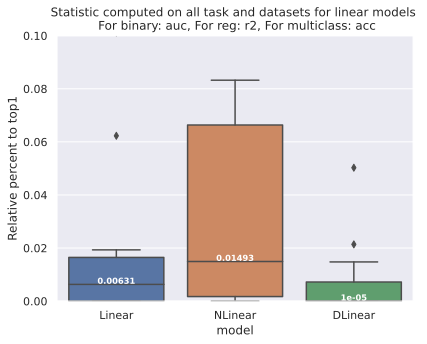

In [186]:
dt2 = _dt.copy()
ind_cols = [x for x in _dt.columns if x not in ["model", "value"]]
dt2 = dt2[dt2.model.isin(["ConvLSTM", "EarthFormer"]) == False]
dt2 = dt2[dt2.metric.isin(["auc", "r2", "acc"]) == True]

dt2 = pd.pivot_table(dt2, index=ind_cols,
                        columns="model",
                        values=val, aggfunc='max')
dt2 = (dt2.max(axis=1).values.reshape(-1, 1) - dt2) / dt2.values
dt2 = pd.melt(dt2.droplevel(1).droplevel(1).droplevel(1).reset_index(), id_vars=["task"])


f, ax = plt.subplots()
boxplot = sns.boxplot(dt2, x="model", y="value", ax=ax, order=["Linear", "NLinear", "DLinear"])
ax.set_ylim(0, 0.1)

medians = dt2.groupby(['model'])['value'].median().round(5).loc[["Linear", "NLinear", "DLinear"]]
medians
vertical_offset = dt2['value'].median() * 0.05 # offset from median for display

for xtick in boxplot.get_xticks():
    boxplot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Statistic computed on all task and datasets for linear models \n For binary: auc, For reg: r2, For multiclass: acc")
plt.ylabel("Relative percent to top1")
plt.show()

______________________________________________________________


Missouri


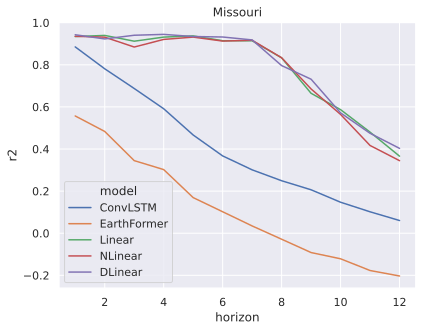

MadhyaPradesh


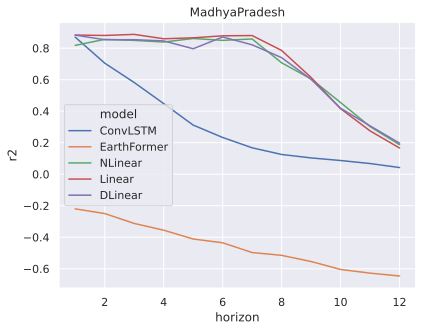

CentralKZ


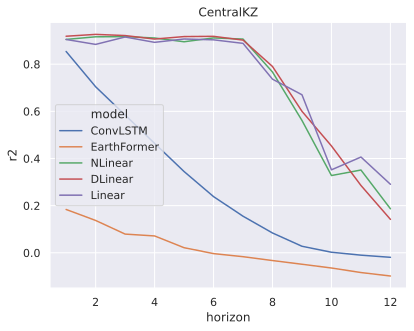

In [24]:
new_dt = pd.DataFrame(columns=["data", "model", "horizon", "r2"])

exp_ids = exp_ids2
_dt = dt[(dt.exp_id.isin(exp_ids)) & (dt.task == "reg")].copy()
_dt = _dt[_dt["r2_curve_test"].isna() == False]

for i, r in _dt.iterrows():
    for j, v in enumerate(eval(r["r2_curve_test"])):
        new_dt.loc[len(new_dt)] = [r["data"], r["model"], j + 1, v]
_dt = new_dt

for dataset in _dt.data.unique():
    print(dataset)
    f, ax = plt.subplots()
    sns.lineplot(data=_dt[_dt.data == dataset], x='horizon', y='r2', hue='model', ax=ax)
    ax.set_title(dataset)
    plt.show()

Missouri


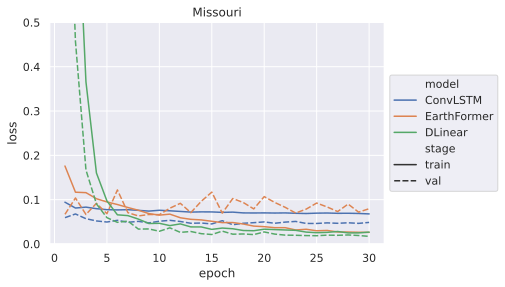

MadhyaPradesh


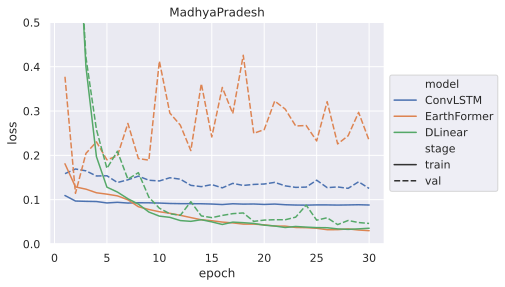

CentralKZ


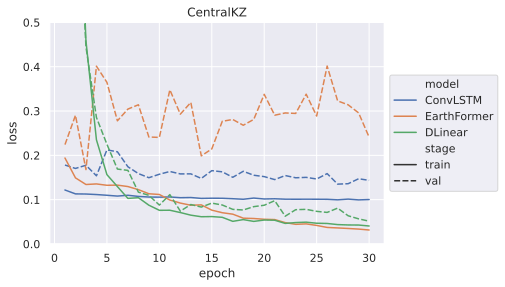

In [15]:
new_dt = pd.DataFrame(columns=["data", "model", "epoch", "stage", "loss"])

exp_ids = exp_ids2
_dt = dt[(dt.exp_id.isin(exp_ids2)) & (dt.task == "reg")].copy()
_dt = _dt[_dt["r2_curve_test"].isna() == False]

for i, r in _dt.iterrows():
    for j, v in enumerate(eval(r["train_loss_epoch"])):
        new_dt.loc[len(new_dt)] = [r["data"], r["model"], j + 1, "train", v]
    
    for j, v in enumerate(eval(r["val_loss_epoch"])):
        new_dt.loc[len(new_dt)] = [r["data"], r["model"], j + 1, "val", v]
_dt = new_dt
_dt = _dt[_dt.epoch <= 30]
_dt = _dt[_dt.model.isin(["Linear", "NLinear"]) == False]
# _dt = _dt[_dt.model.isin(["EarthFormer"])]

for dataset in _dt.data.unique():
    print(dataset)
    f, ax = plt.subplots(figsize=(6, 4))
    sns.lineplot(data=_dt[_dt.data == dataset], x='epoch', y='loss', style='stage', hue='model', ax=ax)
    ax.set_ylim(0, 0.5)
    ax.set_title(dataset)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [195]:
color = "darkgreen"
# color = "lightgreen"

model_order = ["Linear", "NLinear", "DLinear", "ConvLSTM", "EarthFormer"]
k = "1"
task_to_metric = {
    "binary": "auc_" + k + "_test",
    "reg": "r2_" + k + "_test",
    "multiclass": "acc_" + k + "_test",
}

for exp_ids in [exp_ids4]:
    _dt = dt[dt.exp_id.isin(exp_ids)].copy()
    for task in _dt.task.unique():
        metric = task_to_metric[task]
        
        _dt.rename({"model_params.temperature": "T", "model_params.emb_len": "emb_len"}, axis=1, inplace=True)
        _dt["emb_len"] = _dt["emb_len"].astype(int)
        display(
        pd.pivot_table(_dt, index=_dt["emb_len"],
                        columns=_dt["T"],
                        values=metric, aggfunc='max').style.highlight_max(axis=1, color=color).format('{:.3f}')\
        )
        # print(
        # pd.pivot_table(_dt, index=_dt["emb_len"],
        #                 columns=_dt["T"],
        #                 values=metric, aggfunc='max').round(3).to_latex()\
        # )


T,0.500000,1.000000,2.000000
emb_len,,,
16,0.823,0.836,0.825
32,0.826,0.832,0.864
64,0.874,0.882,0.876


In [201]:
color = "darkgreen"
# color = "lightgreen"

model_order = ["Linear", "NLinear", "DLinear", "ConvLSTM", "EarthFormer"]
k = "1"
task_to_metric = {
    "binary": "auc_" + k + "_test",
    "reg": "r2_" + k + "_test",
    "multiclass": "acc_" + k + "_test",
}

for exp_ids in [exp_ids6]:
    _dt = dt[dt.exp_id.isin(exp_ids)].copy()
    for task in _dt.task.unique():
        metric = task_to_metric[task]
        print(task, metric)
        dt2 = _dt[_dt.task == task]
        dt2.rename({"model_params.use_emb": "use_emb", "aux_feats": "use_rtl"}, axis=1, inplace=True)
        dt2["use_rtl"] = dt2["use_rtl"].map({"['inter_force_power_2']": True, "[]": False})
        dt2 = dt2[dt2["use_rtl"] != "inter_force_power_2"]
        # dt2 = dt2[((dt2["use_emb"] == True) & (dt2["use_rtl"] == False)) == False]
        # dt2 = dt2[(dt2["use_emb"] == True)]

        display(
        pd.pivot_table(dt2, index=["use_emb", "use_rtl", "data"], 
                        columns=["model"],
                        values=metric, aggfunc='max').style.highlight_max(axis=1, color=color).format('{:.3f}')\
        )
        # print(
        # pd.pivot_table(dt2, index=["use_emb", "data"], 
        #                 columns=["model"],
        #                 values=metric, aggfunc='max')[["Linear", "NLinear", "DLinear"]].round(3).to_latex(multirow=True)\
        # )
        
        # print(
        # pd.pivot_table(dt2, index=["use_rtl", "data"], 
        #                 columns=["model"],
        #                 values=metric, aggfunc='max')[["Linear", "DLinear"]].round(3).to_latex(multirow=True)\
        # )
        


reg r2_1_test


multiclass acc_1_test


binary auc_1_test
